# CW2 - Machine/Deep learning algorithms in cryptocurrency trading

### Data set selection and definition of ML objective

**Objectives**:

1. Use machine/deep learning to predict important cryptocurrency trading parameters namely **price direction**, **volatility** and **price range**.

- **Price Direction**: Predicting whether the price will go up or down in a specified future time frame. This binary outcome (up/down) is often more practical and potentially more accurate than predicting exact future prices.

- **Volatility**: Forecasting the future volatility of a cryptocurrency can be useful for risk management and for strategies that are sensitive to price fluctuations.

- **Price Range**: Predicting the high and low prices for a future period can provide insights into expected price movements and help set stop-loss and take-profit levels.

2. Make predictions for the 5 most popular cryptocurrencies. **Bitcoin**, **Ethereum**, **Ripple**, **Litecoin** and **Monero**.

[Kaggle - Top 100 Cryptocurrencies Historical Dataset](https://www.kaggle.com/datasets/kaushiksuresh147/top-10-cryptocurrencies-historical-dataset/data)

In [1]:
# First lets set the path for Kaggle API
import os

kaggle_dir = os.path.join(os.path.expanduser('~'), '.kaggle')
kaggle_file = os.path.join(kaggle_dir, 'kaggle.json')

# Check if the .kaggle directory exists before creating it
if not os.path.exists(kaggle_dir):
    os.system("mkdir -p " + kaggle_dir)
    print("Created directory " + kaggle_dir)
else:
    print("Directory " + kaggle_dir + " already exists")

# Check if the kaggle.json file exists in the .kaggle directory before moving it
if not os.path.exists(kaggle_file):
    os.system("mv kaggle.json " + kaggle_file)
    os.system("chmod 600 " + kaggle_file)
    print(f"Moved kaggle.json to {kaggle_file} and changed its permissions")
else:
    print("File " + kaggle_file + " already exists, changing its permissions not needed")


# Check if the zip file exists before downloading
if not os.path.exists('top-10-cryptocurrencies-historical-dataset.zip'):
    !kaggle datasets download -d kaushiksuresh147/top-10-cryptocurrencies-historical-dataset
    !unzip top-10-cryptocurrencies-historical-dataset.zip
    print("Downloaded and unzipped top-10-cryptocurrencies-historical-dataset.zip")
else:
    print("File top-10-cryptocurrencies-historical-dataset.zip already exists")

Directory /home/realtime/.kaggle already exists
File /home/realtime/.kaggle/kaggle.json already exists, changing its permissions not needed
File top-10-cryptocurrencies-historical-dataset.zip already exists


### Data preparation and Analysis

In [2]:
# Loading the data into dataframes
import pandas as pd

# List of cryptocurrencies
cryptos = ['bitcoin', 'litecoin', 'ethereum', 'monero', 'xrp']

# Dictionary to store the dataframes
dfs = {}

# Load each CSV file into a DataFrame and store it in the dictionary
for crypto in cryptos:
    df_name = 'raw_' + crypto + '_pd'
    dfs[df_name] = pd.read_csv(f'Top 100 Crypto Coins/{crypto}.csv')
    print(f"Top 5 rows of {df_name}:")
    print(dfs[df_name].head())
    print("\n")

    print(f"Statistics for {df_name}:")
    print(dfs[df_name].describe())
    print("\n")
    
    print(f"Missing values in {df_name}:")
    print(dfs[df_name].isnull().sum())
    print("\n")


Top 5 rows of raw_bitcoin_pd:
         Date  Open  High  Low  Close  Volume Currency
0  2010-07-18   0.0   0.1  0.1    0.1      75      USD
1  2010-07-19   0.1   0.1  0.1    0.1     574      USD
2  2010-07-20   0.1   0.1  0.1    0.1     262      USD
3  2010-07-21   0.1   0.1  0.1    0.1     575      USD
4  2010-07-22   0.1   0.1  0.1    0.1    2160      USD


Statistics for raw_bitcoin_pd:
               Open          High           Low         Close        Volume
count   4420.000000   4420.000000   4420.000000   4420.000000  4.420000e+03
mean    8302.221855   8531.971380   8043.473869   8306.969457  1.395788e+07
std    14598.398937  14992.605971  14146.499234  14599.046649  1.645973e+08
min        0.000000      0.100000      0.000000      0.100000  0.000000e+00
25%      122.500000    129.975000    118.300000    122.800000  3.013600e+04
50%      683.600000    706.500000    657.550000    685.000000  6.762050e+04
75%     8877.250000   9122.700000   8666.900000   8886.075000  1.769402e+05

In [3]:
import plotly.graph_objects as go

# Get the DataFrame for Bitcoin
df_bitcoin_1 = dfs['raw_bitcoin_pd'].copy()

# Create a candlestick plot
fig = go.Figure(data=[go.Candlestick(x=df_bitcoin_1['Date'],
                open =df_bitcoin_1['Open'],
                high =df_bitcoin_1['High'],
                low  =df_bitcoin_1['Low'],
                close=df_bitcoin_1['Close'])])

# Set the title and axis labels
fig.update_layout(
    title='Bitcoin Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price(USD)',
)

# Show the plot
fig.show()

In [4]:
# Let's analyse Bitcoin's price for t

df_bitcoin_1['Date'] = pd.to_datetime(df_bitcoin_1['Date'])

# Get the date one year ago from the latest date in the DataFrame
one_year_ago = df_bitcoin_1['Date'].max() - pd.DateOffset(years=1)

# Filter the DataFrame to include only the data from the last year
df_bitcoin_last_year = df_bitcoin_1[df_bitcoin_1['Date'] >= one_year_ago]

# Create a candlestick plot for the last year's worth of data
fig = go.Figure(data=[go.Candlestick(x=df_bitcoin_last_year['Date'],
                open=df_bitcoin_last_year['Open'],
                high=df_bitcoin_last_year['High'],
                low=df_bitcoin_last_year['Low'],
                close=df_bitcoin_last_year['Close'])])

# Set the title and axis labels
fig.update_layout(
    title='Bitcoin Candlestick Chart (Last Year)',
    xaxis_title='Date',
    yaxis_title='Price(USD)',
)

# Show the plot
fig.show()

In [5]:
import ta
import plotly.subplots as sp

# Calculate the moving average for the last 14 days
df_bitcoin_1['MA'] = ta.trend.sma_indicator(df_bitcoin_1['Close'], window=14)

# Calculate the RSI for the last 14 days
df_bitcoin_1['RSI'] = ta.momentum.rsi(df_bitcoin_1['Close'], window=14)

# Get the date 14 days ago from the latest date in the DataFrame
fourteen_days_ago = df_bitcoin_1['Date'].max() - pd.DateOffset(days=14)

# Filter the DataFrame to include only the data from the last 14 days
df_bitcoin_last_14_days = df_bitcoin_1[df_bitcoin_1['Date'] >= fourteen_days_ago]

# Create a subplot figure
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=False, 
                       subplot_titles=('Moving Average', 'RSI'), 
                       vertical_spacing=0.3, 
                       specs=[[{"secondary_y": True}], [{"secondary_y": True}]])

# Add the moving average trace
fig.add_trace(go.Scatter(x=df_bitcoin_last_14_days['Date'], 
                         y=df_bitcoin_last_14_days['MA'], 
                         mode='lines', 
                         name='Moving Average'), 
              row=1, col=1)

# Add the RSI trace
fig.add_trace(go.Scatter(x=df_bitcoin_last_14_days['Date'], 
                         y=df_bitcoin_last_14_days['RSI'], 
                         mode='lines', 
                         name='RSI'), 
              row=2, col=1)

# Add x-axis labels
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)

# Add y-axis labels
fig.update_yaxes(title_text="USD", row=1, col=1)
fig.update_yaxes(title_text="RSI", row=2, col=1)

# Update the layout to increase the size of the plot
fig.update_layout(height=800, width=1200, title = "Bitcoin Moving Average and RSI (Last 14 Days)")


# Show the plot
fig.show()

### Model Selection and Training

In [6]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def plot_shifted_price(df, shift_days, last_n_days=14):
    """
    Plots the closing price and the shifted closing price for the last 'n' days.

    Parameters:
    df (pandas.DataFrame): The data frame containing the 'Close' and 'Prediction' columns.
    shift_days (int): The number of days the 'Prediction' column is shifted.
    last_n_days (int): The number of last days to plot. Default is 14.
    """
    # Get the last 'n' days
    last_days = df[-last_n_days:]

    # Plot the closing prices and the shifted closing prices
    plt.figure(figsize=(10, 6))
    plt.plot(last_days.index, last_days['Close'], 'blue', label='Closing Price')
    plt.plot(last_days.index, last_days['Prediction'], 'red', label=f'{shift_days} days shifted closing price')

    # Format the date on the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

    # Set the labels and title
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title('Bitcoin Closing Price vs Shifted Closing Price')

    # Show the legend
    plt.legend()

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

#### Building a baseline model (1)

In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

def predict_and_plot(df, days_to_predict):
    # Create a variable for predicting 'n' days out into the future
    projection = days_to_predict

    df.set_index('Date', inplace=True)

    # Create a new column with a name prediction
    df['Prediction'] = df[['Close']].shift(-projection)

    # Create the independent data set (X)
    X = np.array(df[['Close']])
    X = X[:-projection]

    # Create the dependent data set (y)
    y = np.array(df['Prediction'])
    y = y[:-projection]

    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create & train the model
    linReg = LinearRegression()
    linReg.fit(x_train, y_train)

    # Create the independent data set for the projection
    x_projection = np.array(df[['Close']])[-projection:]

    # Use the model to make predictions for the next 'n' days using test data
    linReg_prediction_test = linReg.predict(x_projection.reshape(-1, 1))

    # Use the model to make predictions for the next 'n' days using iterative predictions
    linReg_prediction_iterative = []
    last_day_price = df['Close'].tail(1).values

    for i in range(days_to_predict):
        future_prediction = linReg.predict(last_day_price.reshape(-1, 1))
        linReg_prediction_iterative.append(future_prediction[0])
        last_day_price = future_prediction  # Update last_day_price with the predicted value

    # Get the last 'n' days of closing price data and predicted price
    recent_days = df.index[-days_to_predict:]
    recent_close_price = df['Close'][-days_to_predict:]
    predicted_price_test = linReg_prediction_test
    predicted_price_iterative = linReg_prediction_iterative

    # Create a new DataFrame for plotting
    plot_df = df.loc[recent_days]

    # Add the predicted price to the DataFrame
    plot_df['Predicted_Test'] = np.append([np.nan for _ in range(len(recent_days) - len(predicted_price_test))], predicted_price_test)
    plot_df['Predicted_Iterative'] = np.append([np.nan for _ in range(len(recent_days) - len(predicted_price_iterative))], predicted_price_iterative)
    
    # Plot the actual close price and predicted prices
    plt.figure(figsize=(10,5))
    plt.scatter(plot_df.index, plot_df['Close'], label='Actual Price')
    plt.scatter(plot_df.index, plot_df['Predicted_Test'], label='Predicted Price (Test Data)', color='orange')
    plt.scatter(plot_df.index, plot_df['Predicted_Iterative'], label='Predicted Price (Iterative)', color='green')

    # Add lines between the scatter dots
    plt.plot(plot_df.index, plot_df['Close'], color='blue')
    plt.plot(plot_df.index, plot_df['Predicted_Test'], color='orange')
    plt.plot(plot_df.index, plot_df['Predicted_Iterative'], color='green')

    # Highlight the area between the predicted and actual price
    plt.fill_between(plot_df.index, plot_df['Close'], plot_df['Predicted_Test'], color='skyblue', alpha=0.3)
    plt.fill_between(plot_df.index, plot_df['Close'], plot_df['Predicted_Iterative'], color='lightgreen', alpha=0.3)

    # Set the title and labels
    plt.title(f'Bitcoin Price Prediction for {days_to_predict} days')
    plt.xlabel('Date')
    plt.ylabel('Price(USD)')
    plt.legend()

    # Improve date formatting
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())

    # Rotate date labels to prevent overlap
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.show()


Actual price:
 Date
2022-08-19    20831.3
2022-08-20    21138.9
2022-08-21    21517.2
2022-08-22    21416.3
2022-08-23    21309.0
Name: Close, dtype: float64
Predicted price:
 Date
2022-08-19    20762.132942
2022-08-20    21067.641627
2022-08-21    21443.369637
2022-08-22    21343.155637
2022-08-23    21236.585149
Name: Predicted, dtype: float64


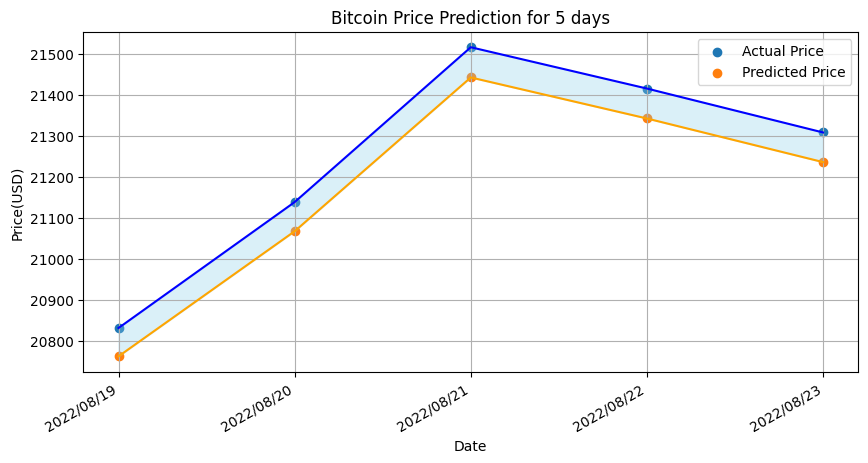

In [8]:
predict_and_plot(df_bitcoin_1, 5)

#### Building a model (2)

           Date  Open  High  Low  Close  Volume Currency  SMA_50  SMA_200  \
199  2011-02-02   0.7   0.8  0.7    0.7    5627      USD   0.336   0.1945   
200  2011-02-03   0.7   0.8  0.7    0.7    8525      USD   0.346   0.1975   
201  2011-02-04   0.7   0.9  0.7    0.8   42222      USD   0.356   0.2010   
202  2011-02-05   0.8   0.9  0.8    0.9   15787      USD   0.370   0.2050   
203  2011-02-06   0.9   0.9  0.8    0.9    8744      USD   0.384   0.2090   
204  2011-02-07   0.9   0.9  0.8    0.9    2264      USD   0.398   0.2130   

       EMA_50   EMA_200      MACD  Signal_Line    RSI  Volatility  \
199  0.362980  0.231407  0.074939     0.045136  100.0    1.338265   
200  0.376197  0.236069  0.085494     0.053207  100.0    1.338265   
201  0.392816  0.241681  0.100766     0.062719  100.0    1.258649   
202  0.412706  0.248231  0.119561     0.074087  100.0    1.204365   
203  0.431816  0.254716  0.132923     0.085855  100.0    1.204365   
204  0.450176  0.261137  0.141877     0.097059

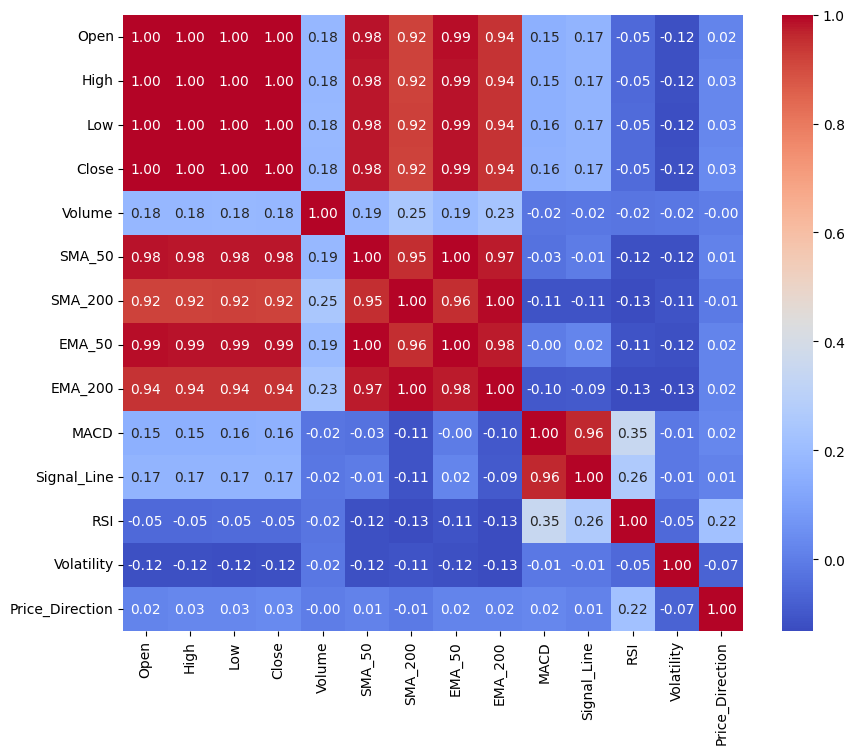

                    Close
Close            1.000000
High             0.999556
Low              0.999468
Open             0.998996
EMA_50           0.985747
SMA_50           0.981267
EMA_200          0.943088
SMA_200          0.919309
Volume           0.182242
Signal_Line      0.169732
MACD             0.156964
Price_Direction  0.033989
RSI             -0.048863
Volatility      -0.120992

Percentages:
 0    51.493213
1    48.506787
Name: Price_Direction, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# We need to add more features to the model to improve its accuracy
# Assuming dfs['raw_bitcoin_pd'] is your DataFrame for Bitcoin
df_bitcoin_2 = dfs['raw_bitcoin_pd'].copy()

# Calculate Moving Averages
df_bitcoin_2['SMA_50']  = df_bitcoin_2['Close'].rolling(window=50).mean()
df_bitcoin_2['SMA_200'] = df_bitcoin_2['Close'].rolling(window=200).mean()

# Calculate Exponential Moving Averages
df_bitcoin_2['EMA_50'] = df_bitcoin_2['Close'].ewm(span=50, adjust=False).mean()
df_bitcoin_2['EMA_200'] = df_bitcoin_2['Close'].ewm(span=200, adjust=False).mean()

# Calculate MACD
# MACD Line = 12-day EMA - 26-day EMA
# Signal Line = 9-day EMA of MACD Line
# MACD Histogram = MACD Line - Signal Line
EMA_12 = df_bitcoin_2['Close'].ewm(span=12, adjust=False).mean()
EMA_26 = df_bitcoin_2['Close'].ewm(span=26, adjust=False).mean()
df_bitcoin_2['MACD'] = EMA_12 - EMA_26
df_bitcoin_2['Signal_Line']    = df_bitcoin_2['MACD'].ewm(span=9, adjust=False).mean()

# Calculate RSI
delta = df_bitcoin_2['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
df_bitcoin_2['RSI'] = 100 - (100 / (1 + RS))

# Calculate Volatility (as the standard deviation of daily returns)
#df_bitcoin_2['Daily_Return'] = df_bitcoin_2['Close'].pct_change()
df_bitcoin_2['Volatility']   = df_bitcoin_2['Close'].pct_change().rolling(window=50).std() * np.sqrt(50)

# If today's close is higher than yesterday's close, price direction is 1 (up), otherwise 0 (down or unchanged)
df_bitcoin_2['Price_Direction'] = (df_bitcoin_2['Close'] > df_bitcoin_2['Close'].shift(1)).astype(int)

# Display the head of the DataFrame to verify the new columns
print(df_bitcoin_2.iloc[199:205])


# Calculate the correlation matrix
correlation_matrix = df_bitcoin_2.corr()

# Focus on the 'High' and 'Low' columns
correlation_with_target = correlation_matrix[['Close']].sort_values(by='Close', ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
# Print the correlation values
print(correlation_with_target)

# Print the percentage for bitcoin price direction
counts = df_bitcoin_2['Price_Direction'].value_counts()
percentages = counts / len(df_bitcoin_2) * 100
print(f"\nPercentages:\n {percentages}")

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics  import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

def feature_importance_verifier(feature):
    # Assuming you're predicting the 'High' price. Adjust as necessary for 'Low'
    X = df_bitcoin_2.drop(['High', 'Low', 'Date', 'Currency', 'Open', 'Close'], axis=1).fillna(0)  # Example feature matrix
    y = df_bitcoin_2[feature].fillna(0)  # Example target variable

    # Initialize and train the random forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Extract feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print(f"Feature ranking for {feature}:")
    for f in range(X.shape[1]):
        print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

def split_data(df, train_percent, val_percent):
    """
    Splits the DataFrame into training, validation, and testing sets.
    """
    # Ensure percentages sum to 1 or less
    assert train_percent + val_percent <= 1, "Training and validation percentages must sum to 1 or less."
    
    # Calculate split indices
    total_rows = len(df)
    train_end = int(total_rows * train_percent)
    val_end = int(total_rows * (train_percent + val_percent))
    
    # Split the data
    train = df.iloc[:train_end]
    val = df.iloc[train_end:val_end]
    test = df.iloc[val_end:]
    
    return train, val, test

def prepare_feature_matrix(df):
    """
    Prepares the feature matrix by excluding specific columns.
    - X: The feature matrix.
    """
    # Columns to exclude from the feature matrix
    columns_to_exclude = ['High', 'Low', 'Date', 'Currency', 'Open', 'Close', 'Price_Direction']
    
    # Exclude specified columns and prepare the feature matrix
    X = df.drop(columns=columns_to_exclude)
    
    return X

def train_and_evaluate_models(df, train_percent=0.80, val_percent=0.10, prediction_feature='Price_Direction'):
    # Assuming split_data and prepare_feature_matrix functions are defined elsewhere
    
    # Split the data
    train, val, test = split_data(df, train_percent, val_percent)
    
    # Prepare feature matrices
    X_train = prepare_feature_matrix(train).values
    X_val = prepare_feature_matrix(val).values
    X_test = prepare_feature_matrix(test).values
    
    # Prepare target vectors
    y_train = train[prediction_feature].values
    y_val = val[prediction_feature].values
    y_test = test[prediction_feature].values
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Initialize models
    models = {
        "LogisticRegression": LogisticRegression(max_iter=10000),
        "RandomForest": RandomForestClassifier(n_estimators=100),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Add parameters as needed
    }
    
    # Initialize report string to save metrics
    report_str = ""
    
    # Train models and collect metrics
    for model_name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)
        # Predict on validation set
        y_pred = model.predict(X_val_scaled)
        
        # Evaluate model performance
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        auc_roc = roc_auc_score(y_val, y_pred)
        
        # Append metrics to report
        report_str += f"Model: {model_name}\n"
        report_str += f"Accuracy: {accuracy}\n"
        report_str += f"Precision: {precision}\n"
        report_str += f"Recall: {recall}\n"
        report_str += f"F1 Score: {f1}\n"
        report_str += f"AUC-ROC: {auc_roc}\n\n"
    
    # Save report to a .txt file
    with open("price_direction_models_report.txt", "w") as file:
        file.write(report_str)
    
    print("Training and evaluation complete. Metrics saved to price_direction_models_report.txt.")

In [11]:
# We know our data has NaN values, so we need to clean it before training the models
feature_importance_verifier('Close')
initial_row_count = len(df_bitcoin_2)
df_bitcoin_2_clean = df_bitcoin_2.dropna()
rows_removed = initial_row_count - len(df_bitcoin_2_clean)
print(f"Number of rows removed: {rows_removed}")
train_and_evaluate_models(df_bitcoin_2_clean)

Feature ranking for Close:
1. feature EMA_50 (0.3673008779142446)
2. feature EMA_200 (0.3040913726100496)
3. feature SMA_200 (0.16157825241829152)
4. feature SMA_50 (0.13988917599661319)
5. feature MACD (0.011997828056180083)
6. feature Signal_Line (0.011465214006342856)
7. feature RSI (0.0018472920762106584)
8. feature Volatility (0.0011822039586075984)
9. feature Volume (0.0005712400022042762)
10. feature Price_Direction (7.65429612556461e-05)
Number of rows removed: 203
Training and evaluation complete. Metrics saved to price_direction_models_report.txt.
